In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from mpl_toolkits import mplot3d
import pickle

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['TARGET'])

In [4]:
data = pd.concat([features, target], axis=1)

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
data2 = data.corr('pearson')

In [7]:
abs(data2['TARGET']).sort_values(ascending=False)

TARGET     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: TARGET, dtype: float64

In [8]:
X = data['RM']
Y = data['TARGET']

In [9]:
X = np.array(X/X.mean())
Y = np.array(Y/Y.mean())

In [10]:
n = int(0.8 * len(X))

In [11]:
x_train = X[:n]
y_train = Y[:n]

In [12]:
x_test = X[n:]
y_test = Y[n:]

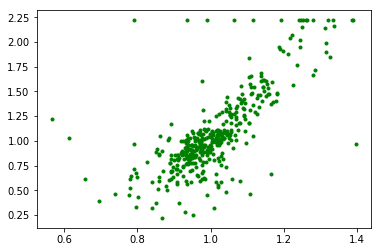

In [13]:
plt.plot(x_train, y_train, 'g.')

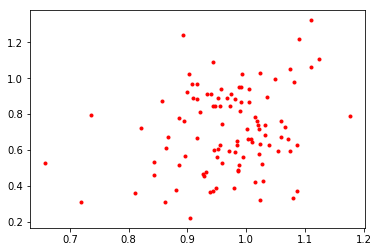

In [14]:
plt.plot(x_test, y_test, 'r.')


In [15]:
def hypothesis(a,b,x):
    return a * x  + b

In [16]:
def error(a,b,x,y):
    e = 0
    m = len(y)
    for i in range(m):
#     e = np.power(np.dot(hypothesis(a,b,x),y), 2)
        e += np.power((hypothesis(a,b,x[i]) - y[i]), 2)
    
    return (1/(2 * m)) * e

In [17]:
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,x[i]) - y[i]) * x[i]
        grad_b += 1/m * (hypothesis(a,b,x[i]) - y[i])
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b

In [18]:
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
        
        a, b = step_gradient(a, b, x, y, learning_rate)

    return a, b

In [19]:
# def descend(initial_a, initial_b, x, y, learning_rate):
#     a = initial_a
#     b = initial_b
#     i = 0
#     while True:
#         e = error(a, b, x ,y)
#         if i % 1000 == 0:
#             print(f"Error: {e}, a: {a}, b: {b}")
        
#         a, b = step_gradient(a, b, x, y, learning_rate)
#         e1 = error(a, b, x, y)
#         if (e1 > e):
#             break
#         i +=1
#     return a, b, i

In [20]:
init_a = 0
init_b = 1
learning_rate = 0.01
iterations = 10000
a = init_a
b = init_b

In [21]:
a, b = descend(a, b, x_train, y_train, learning_rate, iterations)
# final_a, final_b, iters = descend(a, b, x_train, y_train, learning_rate)

Error: 0.08691047391394598, a: 0, b: 1
Error: 0.07708926030401912, a: 0.21314461782342037, b: 0.8745784354256118
Error: 0.07209296957251596, a: 0.37003145582037533, b: 0.7154166649597727
Error: 0.0677224328969421, a: 0.5167652148513465, b: 0.5665551977359419
Error: 0.0638992785092092, a: 0.6540029610039395, b: 0.42732744002236356
Error: 0.06055495021329734, a: 0.782359237660549, b: 0.29710993726992707
Error: 0.05762947804645947, a: 0.9024088174520268, b: 0.1753195823755791
Error: 0.0550704029073936, a: 1.0146892760591748, b: 0.061411004559502984
Error: 0.05283183586798675, a: 1.1197033994482735, b: -0.04512587277644767
Error: 0.05087363530035991, a: 1.217921435320088, b: -0.1447681161448278


In [45]:
final_a, final_b = a, b


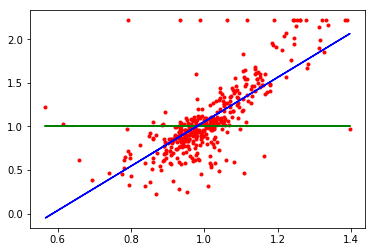

In [47]:
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(init_a, init_b, x_train), 'g', x_train, hypothesis(final_a, final_b, x_train), 'b', )

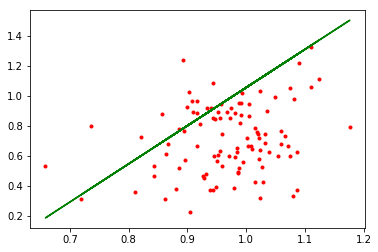

In [48]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g')

In [49]:
print(error(a,b,x_train,y_train))
print(error(final_a, final_b, x_train, y_train))
print(error(final_a, final_b, x_test, y_test))

0.03725338714841409
0.03725338714841409
0.07265492348291211
